In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv(r"C:\Users\kolud\Downloads\diabetes (1).csv")
print(data.shape[1])
print(data.shape[0])
print(data)
print(data.shape)
data.isnull().sum()

9
768
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1            

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [2]:
features = ['Glucose','BloodPressure','Insulin','BMI','Age']
X = data[features]
y = data['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 54,stratify = y)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scale = scalar.fit_transform(X_train)
X_test_scale = scalar.transform(X_test)
X_train = pd.DataFrame(X_train_scale,columns = features)
X_test = pd.DataFrame(X_test_scale,columns = features)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

0.7597402597402597
0.6888888888888889
0.5740740740740741
0.6262626262626263
0.8042592592592592
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



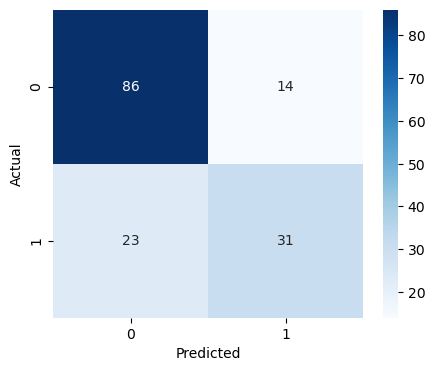

In [4]:
log_reg = LogisticRegression(random_state = 54)
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1] #ROC_AUC

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_proba)
print(acc)
print(prec)
print(rec)
print(f1)
print(roc)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [5]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential([
    Dense(32,input_shape = (X_train.shape[1],),activation = 'relu'),
    Dense(16,activation = 'relu'),
    Dense(8,activation = 'relu'),
    Dense(1,activation = 'linear')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(0.01),
    metrics = ['accuracy']
)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=30, batch_size=16, verbose=0)

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f" Test Accuracy: {test_acc:.3f}")
print(f" Test Loss: {test_loss:.3f}")


 Test Accuracy: 0.753
 Test Loss: 0.717
